# Добавление кросс-переменных в модель
## 1. Загрузка библиотек и выборок

In [1]:
import pandas as pd
import numpy as np
from vtb_scorekit.data import DataSamples
from vtb_scorekit.woe import WOE
from vtb_scorekit.model import LogisticRegressionModel

result_folder = 'titanic_output'

ds = DataSamples(samples={'train': pd.read_csv('data/train_titanic.csv')}, target='Survived', result_folder='titanic_output', 
                 id_column='PassengerId', samples_split={'test_size': 0.2}, bootstrap_split={'bootstrap_part': 1.5})

[INFO] [2023-06-01 15:18:41] ---------------------------------------------------------------- Creating DataSamples ----------------------------------------------------------------
[INFO] [2023-06-01 15:18:41] Selected 7 features: ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
[INFO] [2023-06-01 15:18:41] Selected 5 categorical features: ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
[INFO] [2023-06-01 15:18:41] Actual parts of samples after samples split:
      train   Test
part  0.799  0.201
[INFO] [2023-06-01 15:18:41] 100 bootstrap samples with 1068 observation each and 0.3839 mean target rate were created
[INFO] [2023-06-01 15:18:41] DataSamples stats:
             train   Test Bootstrap base
amount         712    179            712
target         273     69            273
target_rate  0.383  0.385          0.383
period          NA     NA             NA


## 2. Расчет кросс-переменных на готовой скоркарте и сборка модели

[INFO] [2023-06-01 15:18:41] ------------------------------------------------------------------------ SFA -------------------------------------------------------------------------
[INFO] [2023-06-01 15:18:41] Performing autobinning for cross features with parameters space of size 1...
[INFO] [2023-06-01 15:18:41] Finding the best pairs to first-level features...


100%|██████████| 7/7 [00:00<00:00,  7.52it/s]

[INFO] [2023-06-01 15:18:42] Creating feature_crosses...



100%|██████████| 7/7 [00:00<00:00, 13.64it/s]

[INFO] [2023-06-01 15:18:43] Using parameters set 1/1: {'method': 'opt', 'max_n_bins': 10, 'min_bin_size': 0.05, 'criterion': 'entropy', 'scoring': 'neg_log_loss', 'max_depth': 5, 'solver': 'cp', 'divergence': 'iv', 'WOEM_on': True, 'WOEM_woe_threshold': 0.05, 'WOEM_with_missing': False, 'SM_on': False, 'SM_target_threshold': 5, 'SM_size_threshold': 100, 'G_on': False, 'G_gini_threshold': 5, 'G_gini_decrease_threshold': 0.2, 'G_gini_increase_restrict': True, 'G_with_test': False, 'WOEO_on': False, 'WOEO_dr_threshold': 0.005, 'WOEO_correct_threshold': 0.85, 'WOEO_miss_is_incorrect': True, 'WOEO_with_test': False, 'BL_on': True, 'BL_allow_Vlogic_to_increase_gini': 10, 'verbose': False}
[INFO] [2023-06-01 15:18:43] Processing 7 first level features on 1 CPU...



  0%|          | 0/7 [00:00<?, ?it/s]

[INFO] [2023-06-01 15:18:43] Current binning for cross_Age&Fare:
  group                           values    woe   n  n1
[-1, 0]              nan & [-inf, 7.731]  1.886  28   2
[-1, 1]             nan & [7.731, 28.71]  0.460  93  26
[-1, 2]               nan & [28.71, inf] -0.707  25  14
 [0, 0]     [-inf, 13.5] & [-inf, 21.55] -1.407  22  16
 [0, 1]   [-inf, 13.5] & [21.55, 39.344] -0.404  27  13
 [0, 2]     [-inf, 13.5] & [39.344, inf] -0.023   8   3
 [1, 0]       [13.5, 17.5] & [-inf, inf] -0.258  36  16
 [2, 0]     [17.5, 54.5] & [-inf, 7.133]  1.677  23   2
 [2, 1]    [17.5, 54.5] & [7.133, 9.492]  0.935 134  26
 [2, 2]   [17.5, 54.5] & [9.492, 25.758]  0.128 122  43
 [2, 3]  [17.5, 54.5] & [25.758, 52.277] -0.449  75  37
 [2, 4] [17.5, 54.5] & [52.277, 112.079] -1.307  60  42
 [2, 5]    [17.5, 54.5] & [112.079, inf] -1.927  28  23
 [3, 0]     [54.5, inf] & [-inf, 73.125]  1.041  24   4
 [3, 1]      [54.5, inf] & [73.125, inf] -1.941   7   6
[INFO] [2023-06-01 15:18:44] Current bi

 14%|█▍        | 1/7 [00:01<00:10,  1.69s/it]

[INFO] [2023-06-01 15:18:45] Current binning for cross_SibSp&Fare:
 group                     values    woe   n  n1
[0, 0] [3, 4, 5, 8] & [-inf, inf]  1.165  39   6
[1, 0]     [0, 2] & [-inf, 7.133]  1.993  31   2
[1, 1]    [0, 2] & [7.133, 9.288]  0.856 212  44
[1, 2]    [0, 2] & [9.288, 11.75]  0.384  41  12
[1, 3]   [0, 2] & [11.75, 19.023] -0.088  67  27
[1, 4]    [0, 2] & [19.023, 53.5] -0.454  93  46
[1, 5]    [0, 2] & [53.5, 79.425] -0.927  26  16
[1, 6]     [0, 2] & [79.425, inf] -1.685  36  28
[2, 0]       [1] & [-inf, 10.798]  1.051  13   2
[2, 1]     [1] & [10.798, 49.381] -0.332  97  45
[2, 2]    [1] & [49.381, 112.079] -1.602  46  35
[2, 3]       [1] & [112.079, inf] -2.421  11  10
[INFO] [2023-06-01 15:18:46] Current binning for cross_SibSp&Age:
  group                     values    woe   n  n1
[0, -1]         [3, 4, 5, 8] & nan  2.358   8   0
 [0, 0] [3, 4, 5, 8] & [-inf, 3.5]  1.260   9   1
 [0, 1]  [3, 4, 5, 8] & [3.5, inf]  0.682  22   5
[1, -1]               [0, 2] &

 29%|██▊       | 2/7 [00:03<00:07,  1.52s/it]

[INFO] [2023-06-01 15:18:47] Current binning for cross_Embarked&Age:
  group                values    woe   n  n1
[0, -1]           ['S'] & nan  0.808  75  16
 [0, 0]   ['S'] & [-inf, 8.5] -0.940  34  21
 [0, 1]   ['S'] & [8.5, 53.5]  0.120 383 136
 [0, 2]   ['S'] & [53.5, inf]  0.674  26   6
[1, -1]           ['Q'] & nan -0.139  41  17
 [1, 0]   ['Q'] & [-inf, inf]  0.327  20   6
[2, -1]           ['C'] & nan  0.342  30   9
 [2, 0] ['C'] & [-inf, 14.25] -1.810  11   9
 [2, 1] ['C'] & [14.25, 29.5] -0.949  42  26
 [2, 2]  ['C'] & [29.5, 44.5] -0.753  28  16
 [2, 3]   ['C'] & [44.5, inf] -0.475  22  11
[INFO] [2023-06-01 15:18:47] Current binning for cross_Embarked&Fare:
 group                    values    woe   n  n1
[0, 0]     ['S'] & [-inf, 7.133]  1.993  31   2
[0, 1]   ['S'] & [7.133, 10.481]  1.155 173  28
[0, 2]  ['S'] & [10.481, 12.375]  0.244  28   9
[0, 3]  ['S'] & [12.375, 25.927] -0.073 110  44
[0, 4]   ['S'] & [25.927, 50.74] -0.241 102  45
[0, 5]   ['S'] & [50.74, 84.987] 

 43%|████▎     | 3/7 [00:04<00:06,  1.52s/it]

[INFO] [2023-06-01 15:18:48] Current binning for cross_Parch&Fare:
 group                      values    woe   n  n1
[0, 0]   [0, 4, 5] & [-inf, 7.133]  2.092  34   2
[0, 1]   [0, 4, 5] & [7.133, 9.84]  0.862 227  47
[0, 2]  [0, 4, 5] & [9.84, 25.927]  0.127 133  47
[0, 3] [0, 4, 5] & [25.927, 50.74] -0.158  76  32
[0, 4]    [0, 4, 5] & [50.74, inf] -1.587  82  62
[1, 0]        [1] & [-inf, 10.798]  0.483   8   2
[1, 1]      [1] & [10.798, 81.404] -0.552  75  39
[1, 2]         [1] & [81.404, inf] -1.471  12   9
[2, 0]     [2, 3] & [-inf, 67.275] -0.384  44  21
[2, 1]      [2, 3] & [67.275, inf] -0.858  20  12
[INFO] [2023-06-01 15:18:49] Current binning for cross_Parch&Age:
  group                   values    woe   n  n1
[0, -1]          [0, 4, 5] & nan  0.389 132  39
 [0, 0] [0, 4, 5] & [-inf, 25.5]  0.330 146  45
 [0, 1]  [0, 4, 5] & [25.5, inf] -0.014 274 106
[1, -1]                [1] & nan -0.221   7   3
 [1, 0]        [1] & [-inf, 1.5] -1.939   7   6
 [1, 1]         [1] & [1.5, 6

 57%|█████▋    | 4/7 [00:06<00:04,  1.56s/it]

[INFO] [2023-06-01 15:18:49] Current binning for cross_Sex&Fare:
 group                      values    woe   n  n1
[0, 0]     ['male'] & [-inf, 7.91]  2.145 139   9
[0, 1]   ['male'] & [7.91, 10.871]  1.264  96  14
[0, 2] ['male'] & [10.871, 26.144]  1.026  95  17
[0, 3] ['male'] & [26.144, 52.277]  0.410  76  22
[0, 4]    ['male'] & [52.277, inf] -0.224  55  24
[1, 0] ['female'] & [-inf, 25.698] -1.097 135  88
[1, 1] ['female'] & [25.698, 48.2] -1.152  45  30
[1, 2]    ['female'] & [48.2, inf] -3.800  71  69
[INFO] [2023-06-01 15:18:50] Current binning for cross_Sex&Age:
  group                     values    woe   n  n1
[0, -1]             ['male'] & nan  1.356 104  14
 [0, 0]    ['male'] & [-inf, 13.0] -0.719  32  18
 [0, 1]     ['male'] & [13.0, inf]  1.131 325  54
[1, -1]           ['female'] & nan -1.151  42  28
 [1, 0]  ['female'] & [-inf, 12.0] -0.558  23  12
 [1, 1] ['female'] & [12.0, 32.25] -1.586 110  83
 [1, 2]  ['female'] & [32.25, inf] -2.116  76  64
[INFO] [2023-06-01 15

 71%|███████▏  | 5/7 [00:07<00:02,  1.41s/it]

[INFO] [2023-06-01 15:18:51] Current binning for cross_Fare&Age:
  group                           values    woe  n  n1
[0, -1]              [-inf, 7.404] & nan  1.677 23   2
 [0, 0]    [-inf, 7.404] & [-inf, 23.75]  0.624 17   4
 [0, 1]     [-inf, 7.404] & [23.75, inf]  1.511 28   3
[1, -1]            [7.404, 10.481] & nan  0.762 59  13
 [1, 0]   [7.404, 10.481] & [-inf, 18.5] -0.224 23  10
 [1, 1]   [7.404, 10.481] & [18.5, 19.5]  0.624  9   2
 [1, 2]   [7.404, 10.481] & [19.5, 32.5]  0.963 85  16
 [1, 3]    [7.404, 10.481] & [32.5, inf]  1.549 29   3
[2, -1]           [10.481, 25.927] & nan  0.156 35  12
 [2, 0] [10.481, 25.927] & [-inf, 14.25] -1.632 22  17
 [2, 1] [10.481, 25.927] & [14.25, 35.5]  0.042 86  32
 [2, 2]   [10.481, 25.927] & [35.5, inf]  0.238 37  12
[3, -1]            [25.927, 50.74] & nan -0.207 14   6
 [3, 0]   [25.927, 50.74] & [-inf, 17.5]  0.036 35  13
 [3, 1]    [25.927, 50.74] & [17.5, inf] -0.255 81  36
[4, -1]            [50.74, 84.987] & nan -0.986 11   7


 86%|████████▌ | 6/7 [00:09<00:01,  1.70s/it]

[INFO] [2023-06-01 15:18:53] Current binning for cross_Pclass&Fare:
 group                 values    woe   n  n1
[0, 0]   [3] & [-inf, 10.798]  0.895 263  53
[0, 1]    [3] & [10.798, inf]  0.395 126  37
[1, 0]    [2] & [-inf, 11.75]  0.542  31   8
[1, 1]   [2] & [11.75, 13.25] -0.224  39  17
[1, 2]     [2] & [13.25, inf] -0.927  80  49
[2, 0]   [1] & [-inf, 26.142]  0.749  10   2
[2, 1] [1] & [26.142, 52.277] -0.302  57  26
[2, 2]    [1] & [52.277, inf] -1.637 106  81
[INFO] [2023-06-01 15:18:54] Current binning for cross_Pclass&Age:
  group             values    woe   n  n1
[0, -1]          [3] & nan  0.708 112  26
 [0, 0]  [3] & [-inf, 6.5] -0.224  23  10
 [0, 1]  [3] & [6.5, 18.5]  0.501  52  14
 [0, 2] [3] & [18.5, 27.5]  0.624  93  23
 [0, 3] [3] & [27.5, 33.5]  0.855  54  11
 [0, 4] [3] & [33.5, 39.5]  1.089  25   4
 [0, 5]  [3] & [39.5, inf]  1.959  30   2
[1, -1]          [2] & nan -0.107  10   4
 [1, 0] [2] & [-inf, 50.5] -0.552 129  67
 [1, 1]  [2] & [50.5, inf]  0.412  11   

100%|██████████| 7/7 [00:11<00:00,  1.61s/it]


[INFO] [2023-06-01 15:18:55] Scorecard saved to the file titanic_output/auto_fit_scorecard.xlsx
[INFO] [2023-06-01 15:18:55] All done! Found 21 cross features.
[INFO] [2023-06-01 15:18:55] Chosen model classifier is SGDClassifier(alpha=0.001, loss='log', random_state=0)
[INFO] [2023-06-01 15:18:55] ------------------------------------------------------------------------ MFA -------------------------------------------------------------------------
[INFO] [2023-06-01 15:18:55] Transforming features...
[INFO] [2023-06-01 15:19:00] ---------------------------------------------- Step 1 ----------------------------------------------
[INFO] [2023-06-01 15:19:00] Dropped 0 features with gini lower 5: []
[INFO] [2023-06-01 15:19:00] ---------------------------------------------- Step 2 ----------------------------------------------
[INFO] [2023-06-01 15:19:00] Dropped 0 correlated features: []
[INFO] [2023-06-01 15:19:00] ---------------------------------------------- Step 3 -------------------

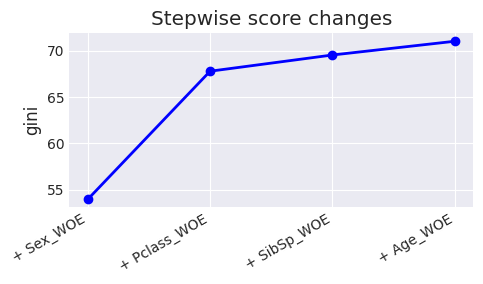

[INFO] [2023-06-01 15:19:01] ---------------------------------------------- Step 4 ----------------------------------------------
[INFO] [2023-06-01 15:19:01] Dropping features with positive coefs and high p-values...
[INFO] [2023-06-01 15:19:01] Nothing to drop
[INFO] [2023-06-01 15:19:01] ------------------------------------------- Final model --------------------------------------------
[INFO] [2023-06-01 15:19:01] intercept = -0.834
[INFO] [2023-06-01 15:19:01] coefs = {'SibSp_WOE': -0.614, 'Sex_WOE': -0.987, 'Pclass_WOE': -1.049, 'Age_WOE': -0.845}
[INFO] [2023-06-01 15:19:01] -------------------------------------------------- MFA for cross features ---------------------------------------------------
[INFO] [2023-06-01 15:19:01] ---------------------------------------------- Step 1 ----------------------------------------------
[INFO] [2023-06-01 15:19:01] Dropped 0 features with gini lower 5: []
[INFO] [2023-06-01 15:19:01] ---------------------------------------------- Step 2 --

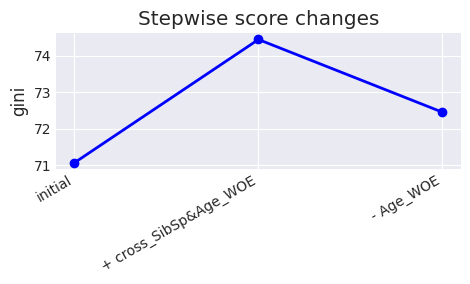

[INFO] [2023-06-01 15:19:02] ---------------------------------------------- Step 4 ----------------------------------------------
[INFO] [2023-06-01 15:19:02] Dropping features with positive coefs and high p-values...
[INFO] [2023-06-01 15:19:02] To drop: SibSp_WOE, gini: 19.78, coef: 0.6147183075662028


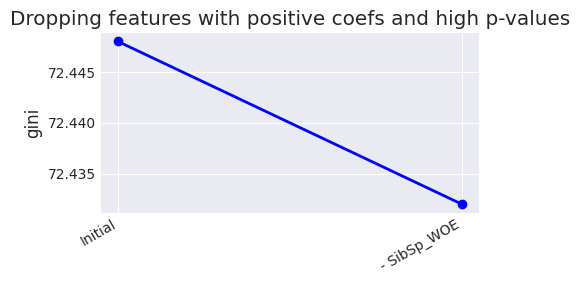

[INFO] [2023-06-01 15:19:02] ------------------------------------------- Final model --------------------------------------------
[INFO] [2023-06-01 15:19:02] intercept = -0.809
[INFO] [2023-06-01 15:19:02] coefs = {'Sex_WOE': -1.016, 'Pclass_WOE': -1.081, 'cross_SibSp&Age_WOE': -0.803}
[INFO] [2023-06-01 15:19:02] Generating report...


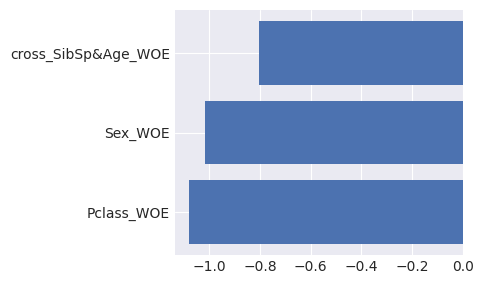

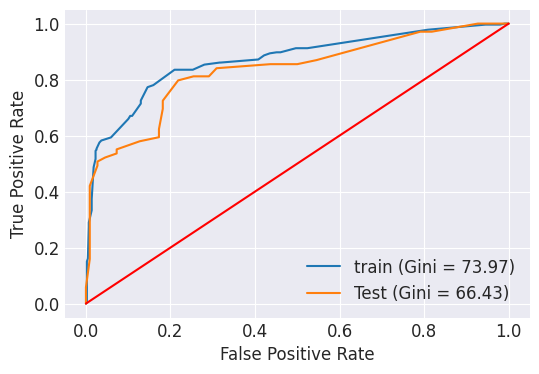

[INFO] [2023-06-01 15:19:03] 
      train   Test  Bootstrap mean  Bootstrap std
Gini  73.97  66.43           73.84           2.34


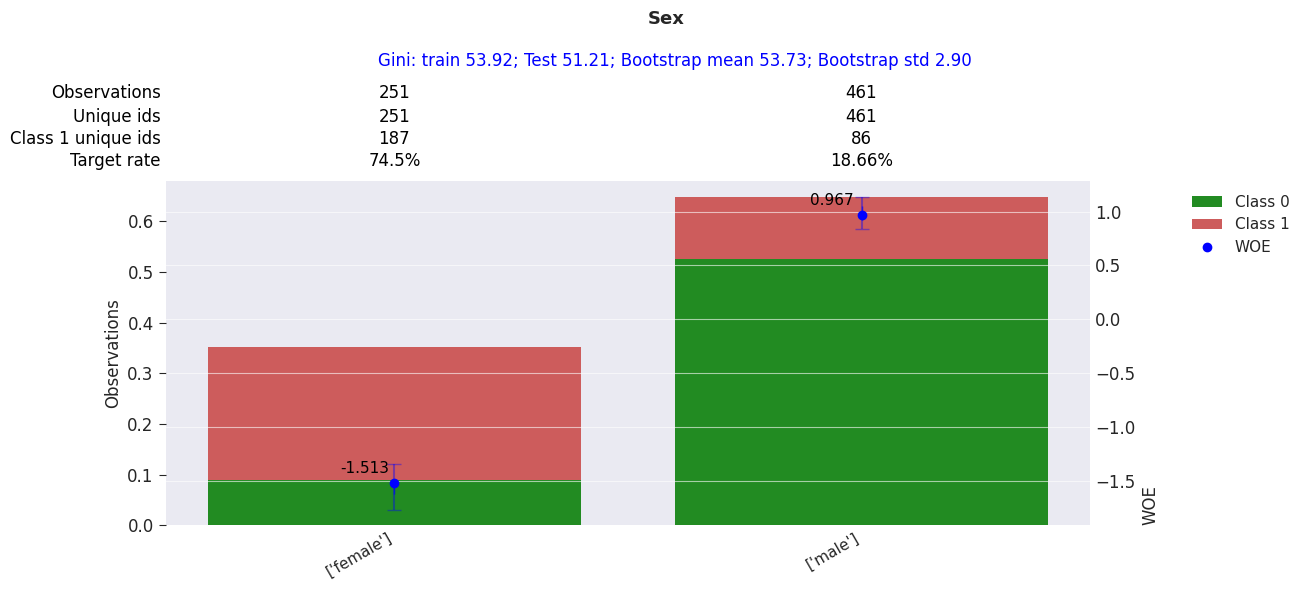

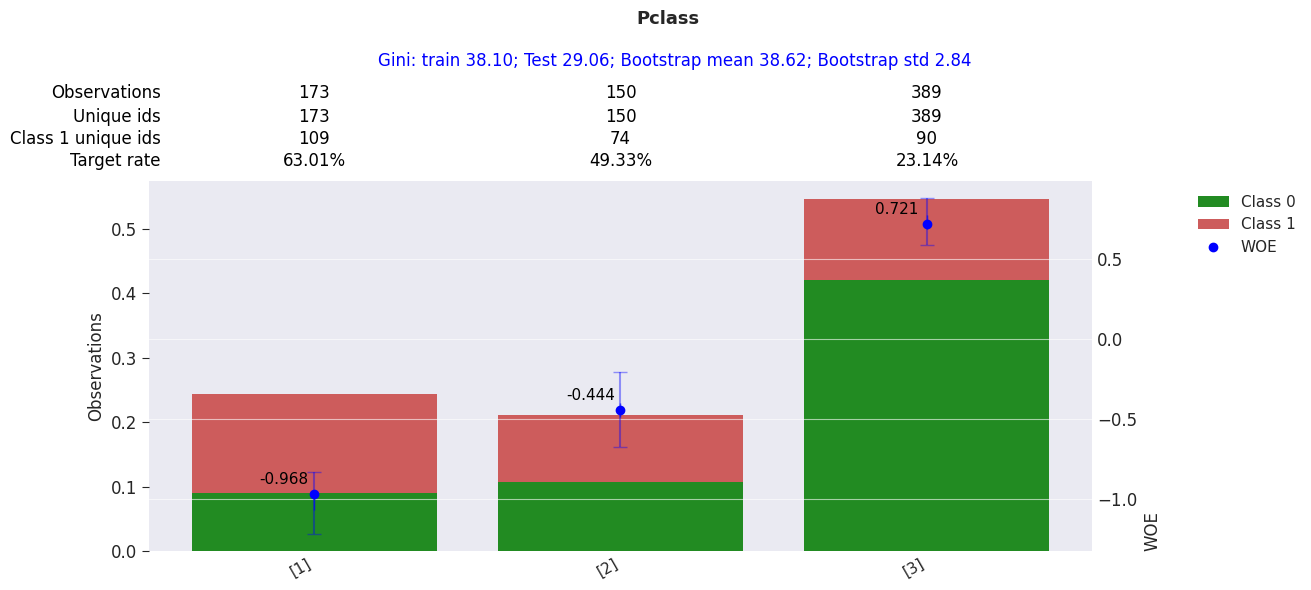

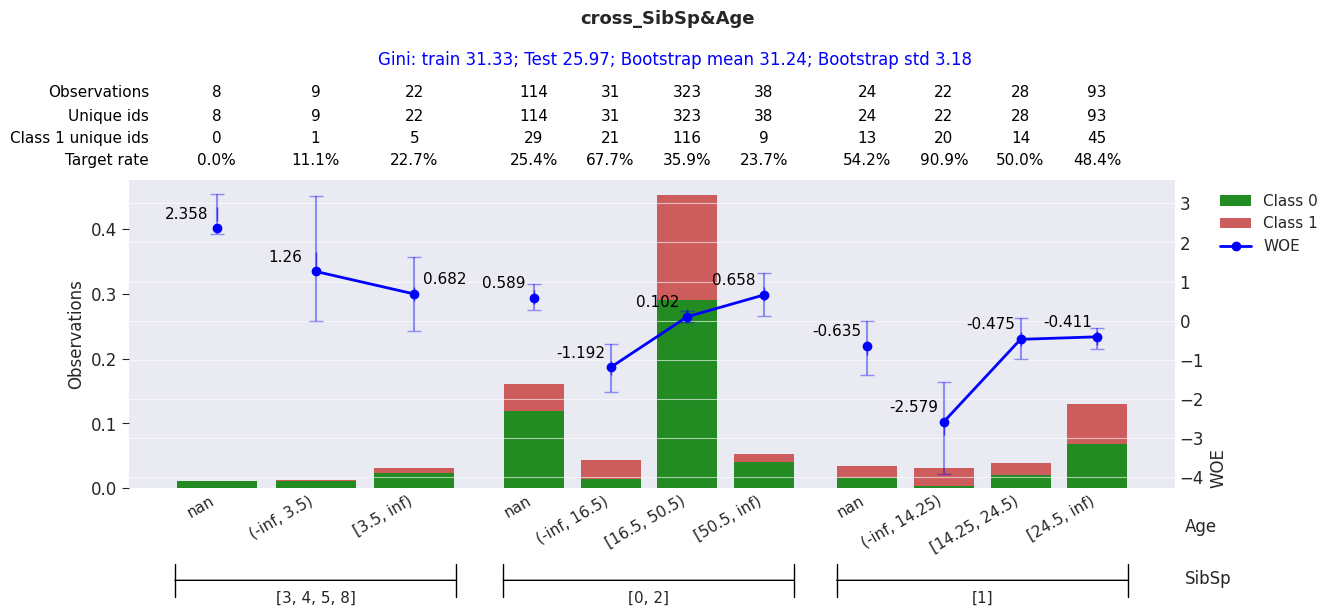

In [2]:
# загрузка биннинга
binning = WOE(ds, scorecard='data/titanic_scorecard.xlsx')

# автобиннинг переменных, отсутвующих в скоркарте модели и последующий поиск кросс-переменных
binning.auto_fit(
                 features=[],                    # при пустом списке автобиннинг обычных переменных не происходит.
                                                 # Для расчета биннинга конркетных кросс-переменных нужно указать их название в списке в явном виде, например   
                                                 # features=['cross_Age&Fare', 'cross_Sex&Parch']
                 #--- Кросс переменные ---
                 cross_features_first_level=None,# список переменных первого уровня для которых будут искаться лучшие кросс пары. При None берется features
                 cross_num_second_level=3        # кол-во кросс пар, рассматриваемых для каждой переменной первого уровня
                                                 #   0 - поиск не производится
                                                 #  -1 - рассматриваются все возможные кросс пары
                                                 #   n - для каждой переменной первого уровня отбираются n лучших переменных с максимальной метрикой criterion
                )
# инициализация модели
logreg = LogisticRegressionModel(ds=ds, transformer=binning)   

# МФА с огранпчением в одну кросс-переменную
logreg.mfa(
           crosses_simple=False,                 # True  - после трансформации кросс-переменные учавствут в отборе наравне со всеми переменными
                                                 # False - сначала выполняется отбор только на основных переменных,
                                                 #     затем в модель добавляются по тем же правилам кросс переменные, но не более, чем crosses_max_num штук
           crosses_max_num=1,                    # максимальное кол-во кросс переменных в модели. учитывается только при crosses_simple=False
          )

## 3. Добавление кросс-переменных в уже готовую модель

[INFO] [2023-06-01 15:19:09] Chosen model classifier is SGDClassifier(alpha=0.001, loss='log', random_state=0)
[INFO] [2023-06-01 15:19:09] The model was loaded from file data/titanic_model.json
[INFO] [2023-06-01 15:19:09] clf = SGDClassifier(alpha=0.001, loss='log', random_state=0)
[INFO] [2023-06-01 15:19:09] name = Titanic
[INFO] [2023-06-01 15:19:09] coefs = {'SibSp_WOE': -0.624, 'Sex_WOE': -0.826, 'Pclass_WOE': -0.815, 'Fare_WOE': -0.377, 'Age_WOE': -0.852}
[INFO] [2023-06-01 15:19:09] intercept = -0.224
[INFO] [2023-06-01 15:19:09] calibration = None
[INFO] [2023-06-01 15:19:09] scale = None
[INFO] [2023-06-01 15:19:09] round_digits = 3
[INFO] [2023-06-01 15:19:10] ------------------------------------------------------------------------ SFA -------------------------------------------------------------------------
[INFO] [2023-06-01 15:19:10] Performing autobinning with parameters space of size 1...
[INFO] [2023-06-01 15:19:10] Using parameters set 1/1: {'method': 'opt', 'max_n_b

100%|██████████| 2/2 [00:00<00:00, 13.58it/s]


[INFO] [2023-06-01 15:19:10] Performing autobinning for cross features with parameters space of size 1...
[INFO] [2023-06-01 15:19:10] Finding the best pairs to first-level features...


100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

[INFO] [2023-06-01 15:19:10] Creating feature_crosses...



100%|██████████| 2/2 [00:00<00:00, 13.24it/s]

[INFO] [2023-06-01 15:19:10] Using parameters set 1/1: {'method': 'opt', 'max_n_bins': 10, 'min_bin_size': 0.05, 'criterion': 'entropy', 'scoring': 'neg_log_loss', 'max_depth': 5, 'solver': 'cp', 'divergence': 'iv', 'WOEM_on': True, 'WOEM_woe_threshold': 0.05, 'WOEM_with_missing': False, 'SM_on': False, 'SM_target_threshold': 5, 'SM_size_threshold': 100, 'G_on': False, 'G_gini_threshold': 5, 'G_gini_decrease_threshold': 0.2, 'G_gini_increase_restrict': True, 'G_with_test': False, 'WOEO_on': False, 'WOEO_dr_threshold': 0.005, 'WOEO_correct_threshold': 0.85, 'WOEO_miss_is_incorrect': True, 'WOEO_with_test': False, 'BL_on': True, 'BL_allow_Vlogic_to_increase_gini': 10, 'verbose': False}
[INFO] [2023-06-01 15:19:10] Processing 2 first level features on 1 CPU...



  0%|          | 0/2 [00:00<?, ?it/s]

[INFO] [2023-06-01 15:19:11] Current binning for cross_Embarked&Age:
  group                values    woe   n  n1
[0, -1]           ['S'] & nan  0.808  75  16
 [0, 0]   ['S'] & [-inf, 8.5] -0.940  34  21
 [0, 1]   ['S'] & [8.5, 53.5]  0.120 383 136
 [0, 2]   ['S'] & [53.5, inf]  0.674  26   6
[1, -1]           ['Q'] & nan -0.139  41  17
 [1, 0]   ['Q'] & [-inf, inf]  0.327  20   6
[2, -1]           ['C'] & nan  0.342  30   9
 [2, 0] ['C'] & [-inf, 14.25] -1.810  11   9
 [2, 1] ['C'] & [14.25, 29.5] -0.949  42  26
 [2, 2]  ['C'] & [29.5, 44.5] -0.753  28  16
 [2, 3]   ['C'] & [44.5, inf] -0.475  22  11
[INFO] [2023-06-01 15:19:11] Current binning for cross_Embarked&Fare:
 group                    values    woe   n  n1
[0, 0]     ['S'] & [-inf, 7.133]  1.993  31   2
[0, 1]   ['S'] & [7.133, 10.481]  1.155 173  28
[0, 2]  ['S'] & [10.481, 12.375]  0.244  28   9
[0, 3]  ['S'] & [12.375, 25.927] -0.073 110  44
[0, 4]   ['S'] & [25.927, 50.74] -0.241 102  45
[0, 5]   ['S'] & [50.74, 84.987] 

 50%|█████     | 1/2 [00:01<00:01,  1.50s/it]

[INFO] [2023-06-01 15:19:12] Current binning for cross_Parch&Fare:
 group                         values    woe   n  n1
[0, 0]   [0, 4, 5, 6] & [-inf, 7.133]  2.090  34   2
[0, 1]   [0, 4, 5, 6] & [7.133, 9.84]  0.860 227  47
[0, 2]  [0, 4, 5, 6] & [9.84, 25.927]  0.124 133  47
[0, 3] [0, 4, 5, 6] & [25.927, 50.74] -0.139  77  32
[0, 4]    [0, 4, 5, 6] & [50.74, inf] -1.590  82  62
[1, 0]           [2] & [-inf, 70.275] -0.168  45  19
[1, 1]            [2] & [70.275, inf] -1.497  16  12
[2, 0]        [1, 3] & [-inf, 10.798]  0.480   8   2
[2, 1]      [1, 3] & [10.798, 15.621] -0.475  12   6
[2, 2]         [1, 3] & [15.621, inf] -0.730  78  44
[INFO] [2023-06-01 15:19:13] Current binning for cross_Parch&Age:
  group                      values    woe   n  n1
[0, -1]          [0, 4, 5, 6] & nan  0.387 132  39
 [0, 0] [0, 4, 5, 6] & [-inf, 25.5]  0.327 146  45
 [0, 1]  [0, 4, 5, 6] & [25.5, inf] -0.010 275 106
[1, -1]                   [2] & nan  2.233   7   0
 [1, 0]          [2] & [-inf,

100%|██████████| 2/2 [00:02<00:00,  1.44s/it]


[INFO] [2023-06-01 15:19:14] Scorecard saved to the file titanic_output/auto_fit_scorecard.xlsx
[INFO] [2023-06-01 15:19:14] All done! 2/2 features successfully binned. Found 6 cross features.
[INFO] [2023-06-01 15:19:14] ------------------------------------------------------------------------ MFA -------------------------------------------------------------------------
[INFO] [2023-06-01 15:19:14] Transforming features...
[INFO] [2023-06-01 15:19:15] ---------------------------------------------- Step 1 ----------------------------------------------
[INFO] [2023-06-01 15:19:15] Dropped 0 features with gini lower 5: []
[INFO] [2023-06-01 15:19:15] ---------------------------------------------- Step 2 ----------------------------------------------
[INFO] [2023-06-01 15:19:15] Dropped 0 correlated features: []
[INFO] [2023-06-01 15:19:15] ---------------------------------------------- Step 3 ----------------------------------------------
[INFO] [2023-06-01 15:19:16] Initial features: ['S

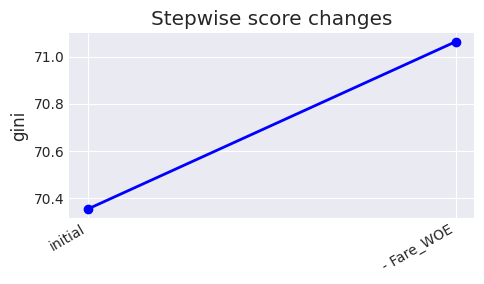

[INFO] [2023-06-01 15:19:16] ---------------------------------------------- Step 4 ----------------------------------------------
[INFO] [2023-06-01 15:19:16] Dropping features with positive coefs and high p-values...
[INFO] [2023-06-01 15:19:16] Nothing to drop
[INFO] [2023-06-01 15:19:16] ------------------------------------------- Final model --------------------------------------------
[INFO] [2023-06-01 15:19:16] intercept = -0.834
[INFO] [2023-06-01 15:19:16] coefs = {'SibSp_WOE': -0.614, 'Sex_WOE': -0.987, 'Pclass_WOE': -1.049, 'Age_WOE': -0.845}
[INFO] [2023-06-01 15:19:16] -------------------------------------------------- MFA for cross features ---------------------------------------------------
[INFO] [2023-06-01 15:19:16] ---------------------------------------------- Step 1 ----------------------------------------------
[INFO] [2023-06-01 15:19:16] Dropped 0 features with gini lower 5: []
[INFO] [2023-06-01 15:19:16] ---------------------------------------------- Step 2 --

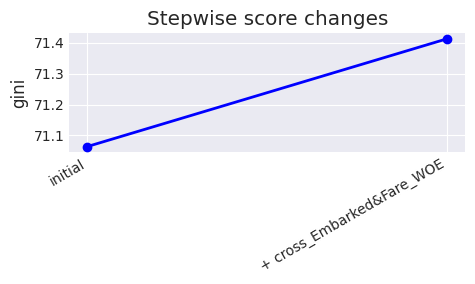

[INFO] [2023-06-01 15:19:16] ---------------------------------------------- Step 4 ----------------------------------------------
[INFO] [2023-06-01 15:19:16] Dropping features with positive coefs and high p-values...
[INFO] [2023-06-01 15:19:17] Nothing to drop
[INFO] [2023-06-01 15:19:17] ------------------------------------------- Final model --------------------------------------------
[INFO] [2023-06-01 15:19:17] intercept = -0.614
[INFO] [2023-06-01 15:19:17] coefs = {'SibSp_WOE': -0.61, 'Sex_WOE': -1.085, 'Pclass_WOE': -0.684, 'Age_WOE': -0.764, 'cross_Embarked&Fare_WOE': -0.533}
[INFO] [2023-06-01 15:19:17] Generating report...


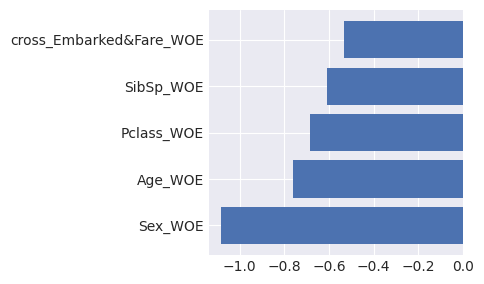

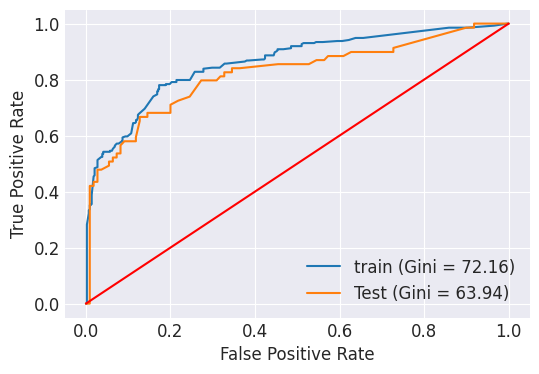

[INFO] [2023-06-01 15:19:18] 
      train   Test  Bootstrap mean  Bootstrap std
Gini  72.16  63.94           72.25           2.41


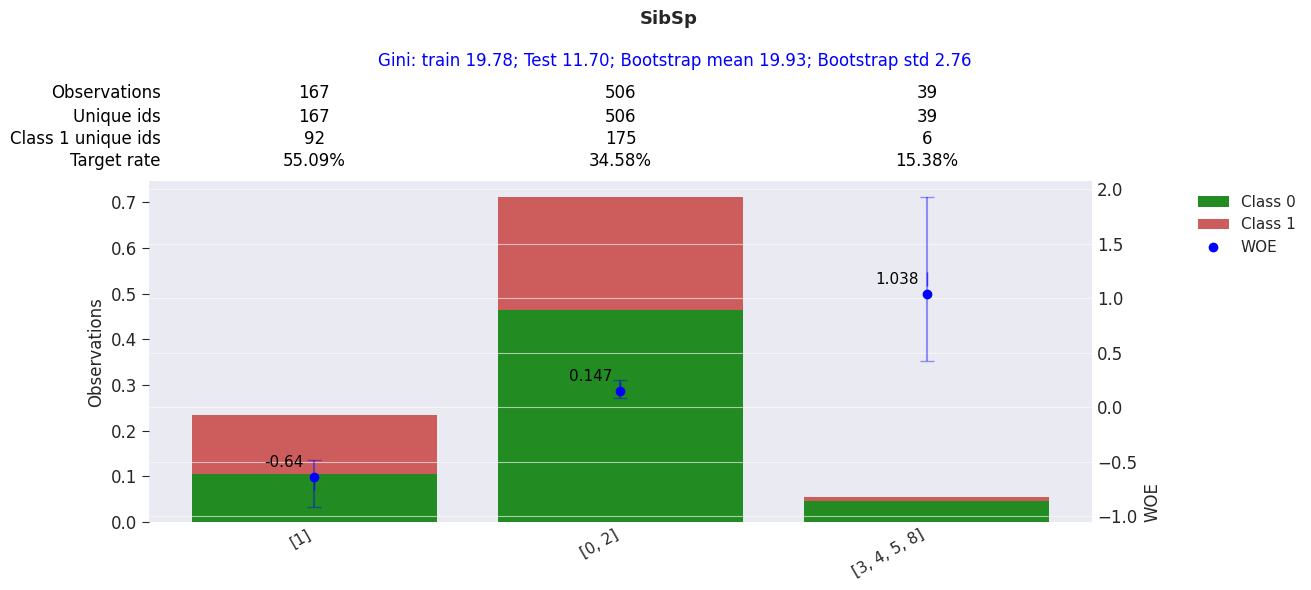

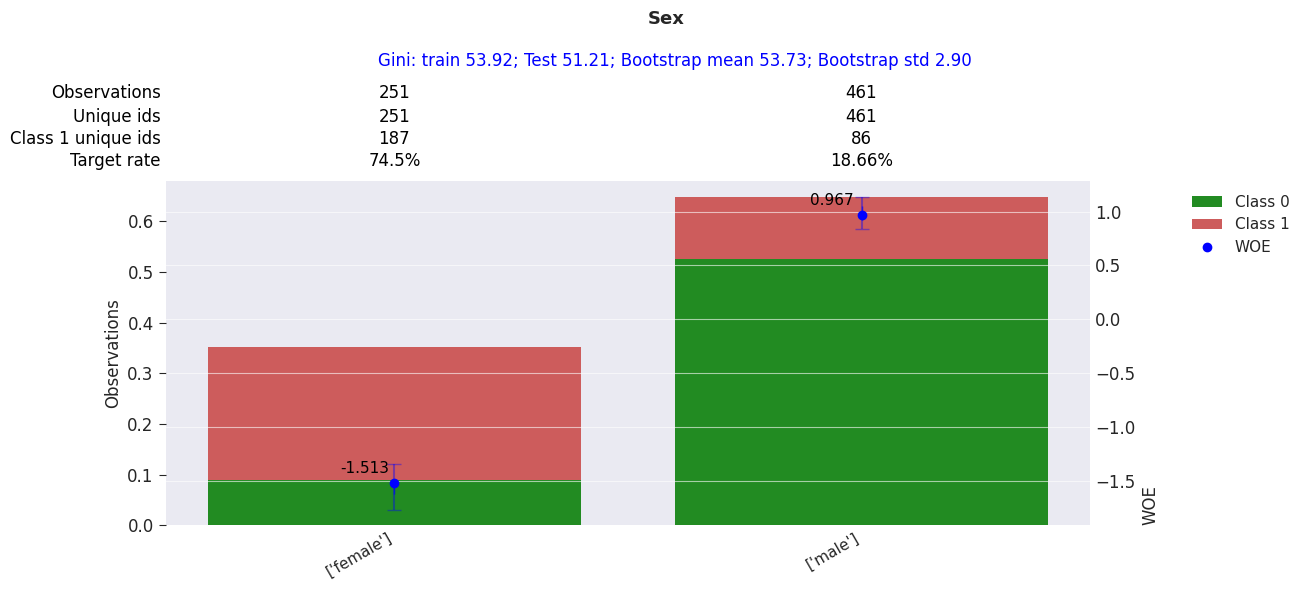

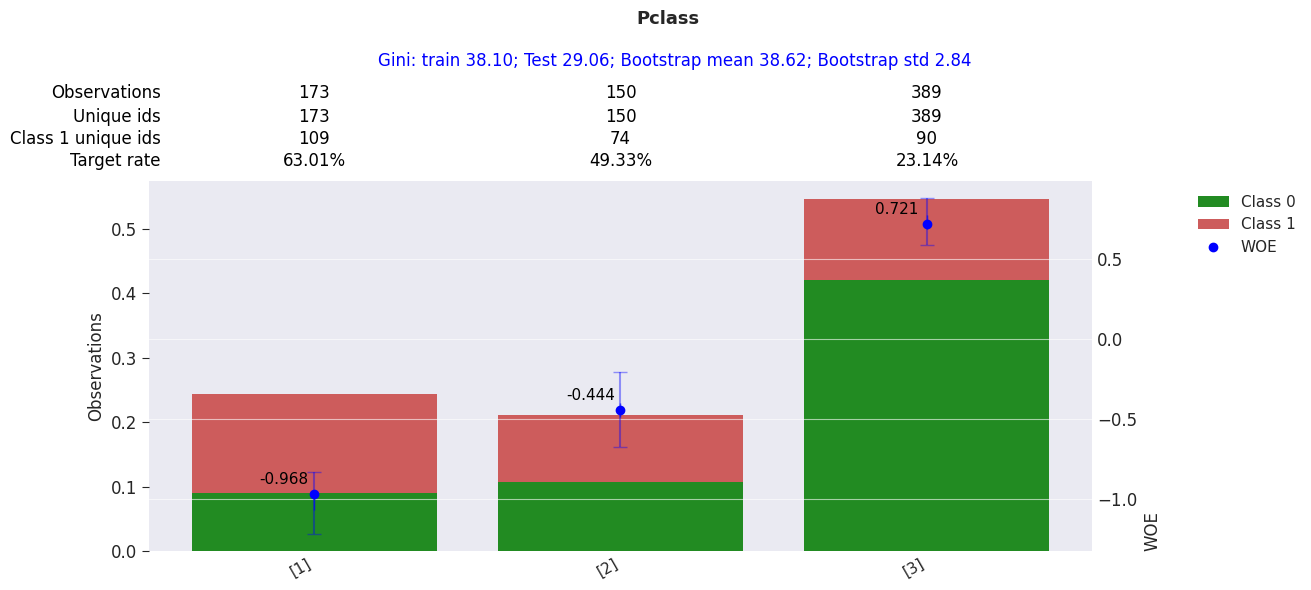

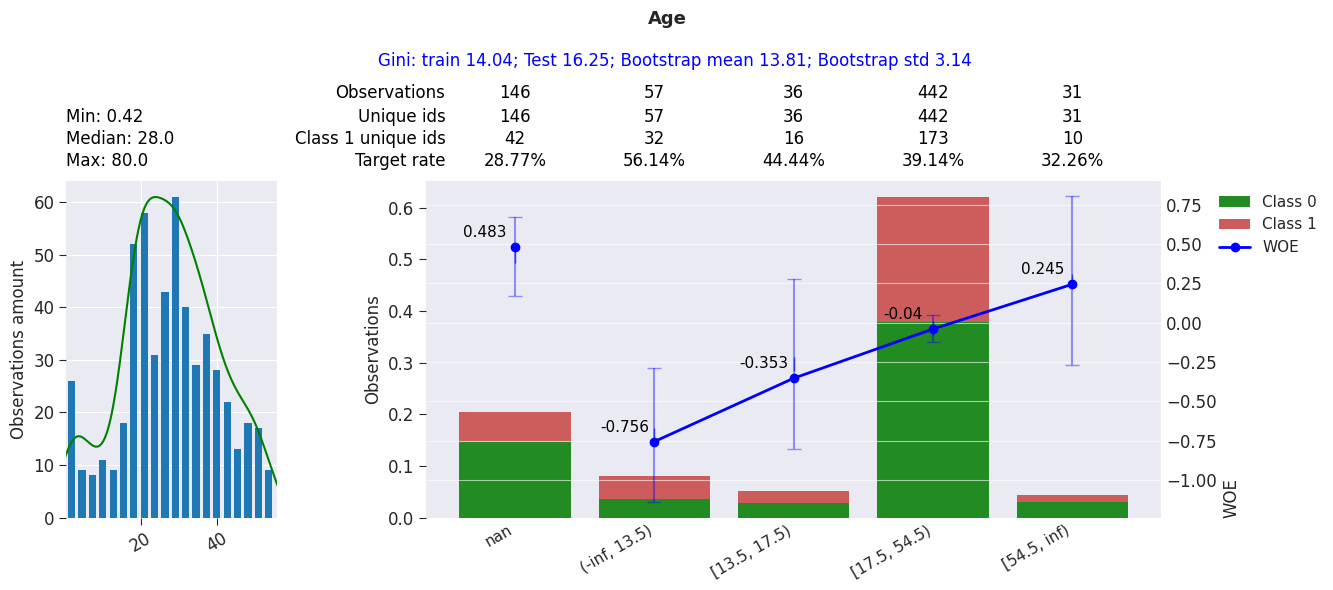

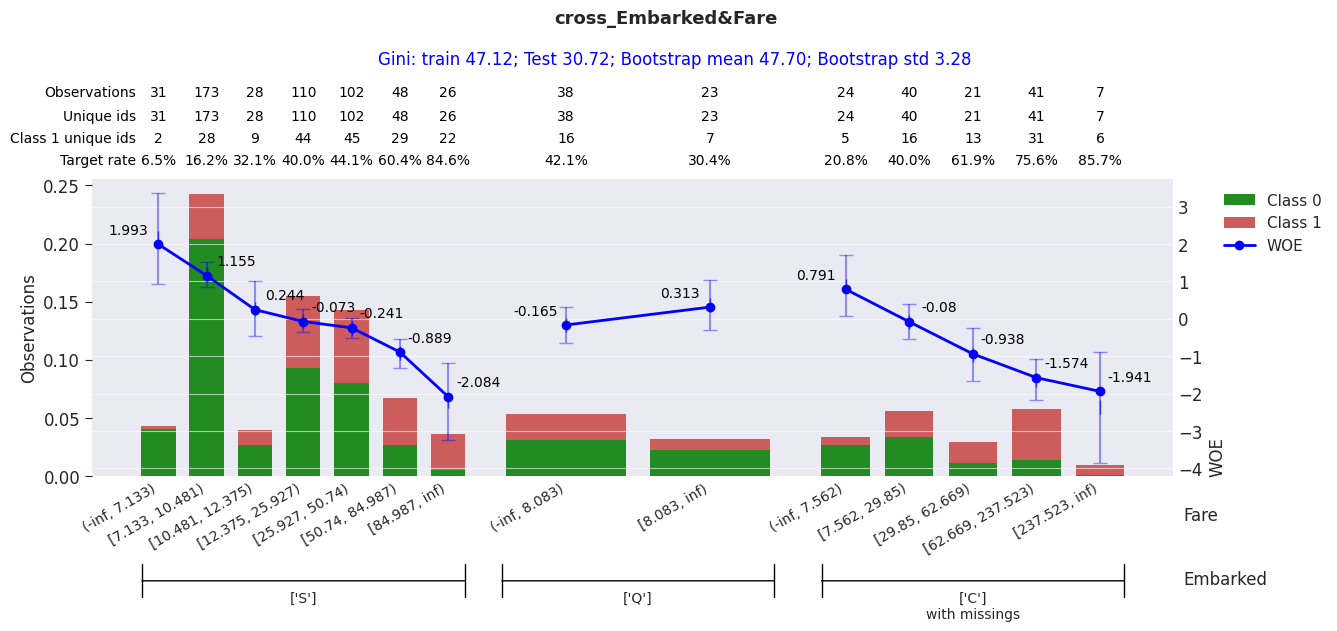

In [3]:
logreg = LogisticRegressionModel(ds=ds)   

# загрузка готовой модели
logreg.load_model(file_name='data/titanic_model.json')

# автобиннинг переменных, отсутвующих в скоркарте модели и последующий поиск кросс-переменных
logreg.transformer.auto_fit(
                             features=list(set(ds.features) - {f[:-4] for f in logreg.features}), # список переменных для обработки. По умолчанию берутся из self.ds.features                 
                             #--- Кросс переменные ---
                             cross_features_first_level=None,# список переменных первого уровня для которых будут искаться лучшие кросс пары. При None берется features
                             cross_num_second_level=3        # кол-во кросс пар, рассматриваемых для каждой переменной первого уровня
                                                             #   0 - поиск не производится
                                                             #  -1 - рассматриваются все возможные кросс пары
                                                             #   n - для каждой переменной первого уровня отбираются n лучших переменных с максимальной метрикой criterion
                            )
# поиск лучше кросс-переменной для добавления в модель
logreg.mfa(
           features_ini=logreg.features,         # список переменных, с которых стартует процедура отбора. Они могут быть исключены в процессе отбора
           crosses_simple=False,                 # True  - после трансформации кросс-переменные учавствут в отборе наравне со всеми переменными
                                                 # False - сначала выполняется отбор только на основных переменных,
                                                 #     затем в модель добавляются по тем же правилам кросс переменные, но не более, чем crosses_max_num штук
           crosses_max_num=1,                    # максимальное кол-во кросс переменных в модели. учитывается только при crosses_simple=False
          )

### 4. Генерация хардкода для использования модели без сторонних библиотек

In [4]:
logreg.to_py(file_name=f'{result_folder}/titanic_model.py', # название питоновского файла, куда должен быть сохранен код
             score_field='score',                           # поле, в которое должен быть записан посчитанный скор
             pd_field='prob',                               # поле, в которое должен быть записан посчитанный PD
             scale_field=None                               # поле, в которое должен быть записан посчитанный грейд
            )

[INFO] [2023-06-01 15:19:28] The model code for implementation saved to file titanic_output/titanic_model.py
import pandas as pd
import numpy as np


def scoring(df, score_field='score', pd_field='pd', scale_field=None):
    """
    Функция скоринга выборки
    Arguments:
        df: [pd.DataFrame] входной ДатаФрейм, должен содержать все нетрансформированные переменные модели
        score_field: [str] поле, в которое должен быть записан посчитанный скор
        pd_field: [str] поле, в которое должен быть записан посчитанный PD
        scale_field: [str] поле, в которое должен быть записан посчитанный грейд
    Returns:
        df: [pd.DataFrame] выходной ДатаФрейм с добавленными полями трансформированных переменных, скоров, PD и грейда
    """

    df['SibSp_WOE'] = np.where(df['SibSp'].isin([3, 4, 5, 8]), 1.038, 
                               np.where(df['SibSp'].isin([0, 2]), 0.147, 
                                        np.where(df['SibSp'].isin([1]), -0.64, 
                   